In [1]:
!pip install gensim scikit-learn matplotlib nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 30.6 MB/s eta 0:00:00


In [2]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
corpus = [
    "Machine learning enables intelligent systems",
    "Deep learning is a subset of machine learning",
    "Artificial intelligence powers modern applications",
    "Neural networks are used in deep learning models"
]


In [5]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)


[['machine', 'learning', 'enables', 'intelligent', 'systems'], ['deep', 'learning', 'is', 'a', 'subset', 'of', 'machine', 'learning'], ['artificial', 'intelligence', 'powers', 'modern', 'applications'], ['neural', 'networks', 'are', 'used', 'in', 'deep', 'learning', 'models']]


In [6]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)


In [7]:
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")


In [8]:
words = list(model.wv.index_to_key)[:10]
print("Selected words:", words)

word_vectors = [model.wv[word] for word in words]


Selected words: ['learning', 'deep', 'machine', 'models', 'in', 'used', 'are', 'networks', 'neural', 'applications']


In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)


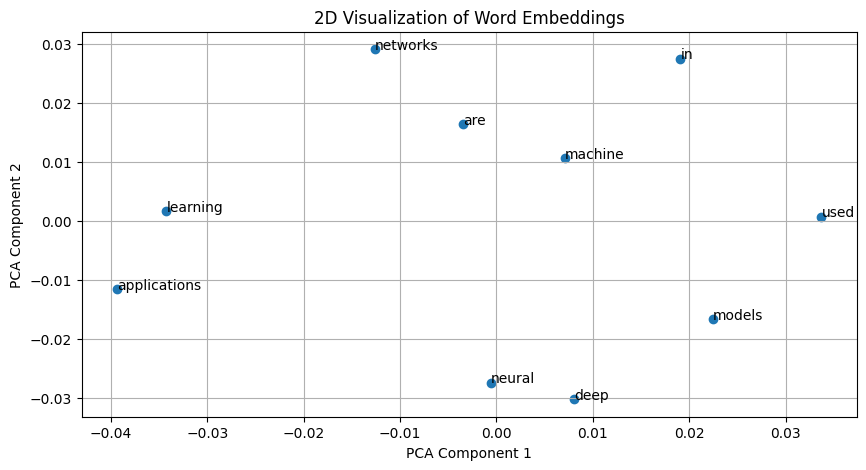

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
